In [1]:
import pandas as pd
from collections import namedtuple
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load EM-DAT Dataset

### What is EM-DAT Database and what is used for?

The EM-DAT dataset catalogs over 26,000 mass disasters worldwide from 1900 to present day.

It is critical to understand that EM-DAT does not catalog all natural disasters worldwide. It instead focuses on mass disasters.

According to EM-DAT and CRED, a mass disaster is a specific type of natural disaster that leads to significant human and economic loss, requiring that at least one of the following criteria hol

- 100 affected people
- 10 fatalities
- ople
A deceleration of state of emergency (at the country 
- evel)
A call for international assistance (again, at the country level)


In [2]:
em_dat_data = pd.read_excel("EM_DAT.xlsx")

## Explanation of EM-DAT Dataset Columns

- **Dis No**: Unique identifier for each recorded disaster event.
- **Year**: The year the disaster occurred.
- **Seq**: Sequence number representing the occurrence order of events in a given year.
- **Disaster Group**: Broad categorization of the disaster (e.g., natural or technological).
- **Disaster Subgroup**: More specific category within the main disaster group (e.g., biological, climatological, hydrological, etc.).
- **Disaster Type**: Specific type of disaster (e.g., wildfire, flood, storm, etc.).
- **Disaster Subtype**: Further subclassification of disaster type (e.g., forest fire, flash flood, tropical cyclone, etc.).
- **Disaster Subsubtype**: Even more detailed classification within the subtype (e.g., mudslide, blizzard, tornado, etc.).
- **Event Name**: Name given to the disaster event, if any (e.g., Tropical Storm Noul, Typhoon Molave, etc.).
- **Entry Criteria**: Criteria that justified the event’s inclusion in the database.
- **Country**: Country where the disaster occurred.
- **ISO**: The ISO code representation of the country (e.g., USA, SRB, YEM, etc.).
- **Region**: Geographical or administrative region within the country (e.g., Northern America, Southern Europe, Caribbean, etc.).
- **Continent**: The continent where the disaster took place.
- **Location**: Specific location or city affected by the disaster (note: this column is very inconsistent — values range from state/province, city, county, etc.).
- **Origin**: Root cause or source of the disaster (e.g., heavy rains, earthquake, landslide, etc.).
- **Associated Dis**: Related disaster events, if any (e.g., famine, industrial accident, heat wave, etc.).
- **Associated Dis2**: Secondary related disaster events.
- **OFDA Response**: U.S. Office of Foreign Disaster Assistance’s response, if any (values are either "yes" or NaN).
- **Appeal**: Any international appeals for assistance (values are either "yes", "no", or NaN).
- **Declaration**: Declarations made regarding the disaster (values are either "yes", "no", or NaN).
- **Aid Contribution**: Amount of aid contributed (reported in thousands of US dollars) in response to the disaster.
- **Dis Mag Value**: Numeric value representing the magnitude of the disaster (must be used in conjunction with Dis Mag Scale to properly interpret).
- **Dis Mag Scale**: Scale used to measure the disaster’s magnitude, such as KPH, Richter, etc. For example, if Dis Mag Value has a value of 110, and Dis Mag Scale reports KPH, then the natural disaster was reported as having a (presumed) wind speed of 110 KPH.
- **Latitude**: Geographic latitude of the disaster’s epicenter or main affected area.
- **Longitude**: Geographic longitude of the disaster.
- **Local Time**: Local time when the disaster occurred or was first reported.
- **River Basin**: The river basin affected (only applicable for flood events).
- **Start Year**: Year the disaster event started.
- **End Year**: Year the disaster event ended.
- **Start Month**: Month the disaster event started.
- **Start Day**: Day the disaster event started.
- **End Month**: Month the disaster event ended.
- **End Day**: Day the disaster event ended.
- **Total Deaths**: Total number of deaths caused by the disaster.
- **No Injured**: Number of individuals injured due to the disaster.
- **No Affected**: Number of individuals affected in any way by the disaster.
- **No Homeless**: Number of individuals rendered homeless by the disaster.
- **Total Affected**: Combined total of injured, affected, and homeless individuals.
- **Reconstruction Costs (‘000 US$)**: Estimated costs in thousands of US dollars for reconstruction after the disaster.
- **Insured Damages (‘000 US$)**: Estimated damages in thousands of US dollars covered by insurance.
- **Total Damages (‘000 US$)**: Total estimated damages in thousands of US dollars due to the disaster.
- **CPI**: Consumer Price Index at the time of the disaster, useful for adjusting costs over time.
ter, useful for adjusting costs over time.

In [3]:
em_dat_data.head(5)

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,1900-0003-USA,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,USA,...,NaN,NaN,NaN,NaN,30000.0,1098720.0,2.730451,NaN,2004-10-18,2023-10-17
1,1900-0005-USA,Yes,tec-ind-fir-fir,Technological,Industrial accident,Fire (Industrial),Fire (Industrial),NaN,NaN,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,2.730451,NaN,2003-07-01,2023-09-25
2,1900-0006-JAM,Yes,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,JAM,...,NaN,NaN,NaN,NaN,NaN,NaN,2.730451,NaN,2003-07-01,2023-09-25
3,1900-0007-JAM,Yes,nat-bio-epi-vir,Natural,Biological,Epidemic,Viral disease,NaN,Gastroenteritis,JAM,...,NaN,NaN,NaN,NaN,NaN,NaN,2.730451,NaN,2003-07-01,2023-09-25
4,1900-0008-JPN,Yes,nat-geo-vol-ash,Natural,Geophysical,Volcanic activity,Ash fall,NaN,NaN,JPN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.730451,NaN,2003-07-01,2023-09-25


# Basic EDA

In [4]:
em_dat_data.shape

(26545, 46)

In [5]:
em_dat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26545 entries, 0 to 26544
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   DisNo.                                     26545 non-null  object 
 1   Historic                                   26545 non-null  object 
 2   Classification Key                         26545 non-null  object 
 3   Disaster Group                             26545 non-null  object 
 4   Disaster Subgroup                          26545 non-null  object 
 5   Disaster Type                              26545 non-null  object 
 6   Disaster Subtype                           26545 non-null  object 
 7   External IDs                               2401 non-null   object 
 8   Event Name                                 8324 non-null   object 
 9   ISO                                        26545 non-null  object 
 10  Country               

In [6]:
def basic_eda(df):
    num_duplicated = df.duplicated().sum()
    is_nan = df.isnull()

    num_null_rows = is_nan.any(axis=1).sum()

    num_total_null = df.isnull().sum().sum()

    EDARow = namedtuple("EDARow", ["Name", "Value", "Notes"])

    rows = [
        EDARow("Samples", df.shape[0], ""),
        EDARow("Features", df.shape[1], ""),
        EDARow("Duplicate Rows", num_duplicated, ""),
        EDARow("Rows With NaN", num_null_rows, "{:.2f}% all rows".format(
            (num_null_rows / df.shape[0]) * 100), 
        ),
        EDARow("Total NaNs", num_total_null, "{:.2f}% features matrix".format(
        (num_total_null / (df.shape[0] * df.shape[1])) * 100)
        )
    ]

    return pd.DataFrame(rows, columns=["Name", "Value", "Notes"])

In [7]:
basic_eda(em_dat_data)

,Name,Value,Notes
0,Samples,26545,
1,Features,46,
2,Duplicate Rows,0,
3,Rows With NaN,26545,100.00% all rows
4,Total NaNs,463985,38.00% features matrix


### Further Summarizing the dataset because its too noisy

In [8]:
def summarize_data(df):
    summary = pd.DataFrame(df.dtypes, columns=["dtypes"])

    summary = summary.reset_index()
    summary["Name"] = summary["index"]
    summary = summary[["Name", "dtypes"]]

    summary["Missing"] = df.isnull().sum().values
    summary["Unique"] = df.nunique().values

    return summary

In [9]:
summarize_data(em_dat_data)

,Name,dtypes,Missing,Unique
0,DisNo.,object,0,26545
1,Historic,object,0,2
2,Classification Key,object,0,66
3,Disaster Group,object,0,2
4,Disaster Subgroup,object,0,9
5,Disaster Type,object,0,32
6,Disaster Subtype,object,0,66
7,External IDs,object,24144,1822
8,Event Name,object,18221,3596
9,ISO,object,0,231


In [30]:
def plot_null_columns(df, title, xlabel="Feature Names", ylabel="# of Null Values", figsize=(20, 6)):
    null_cols = df.isnull().sum().sort_values(ascending=False)

    plt.figure(figsize=figsize)
    sns.set(style="ticks", font_scale=1)
    plt.xticks(rotation=90, fontsize=12)
    sns.despine(top=True, right=True, bottom=False, left=True)

    ax = sns.barplot(x=null_cols.index, y=null_cols, palette="cool_r")

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.title(title)

    for (p, count) in zip(ax.patches, null_cols):
        ax.annotate(
            "{:.1f}%".format((count / df.shape[0]) * 100),
            (p.get_x() + (p.get_width() / 2.0), abs(p.get_height())),
            ha="center",
            va="bottom",
            rotation="vertical",
            color="black",
            xytext=(0,10),
            textcoords="offset points"
        )

        
    

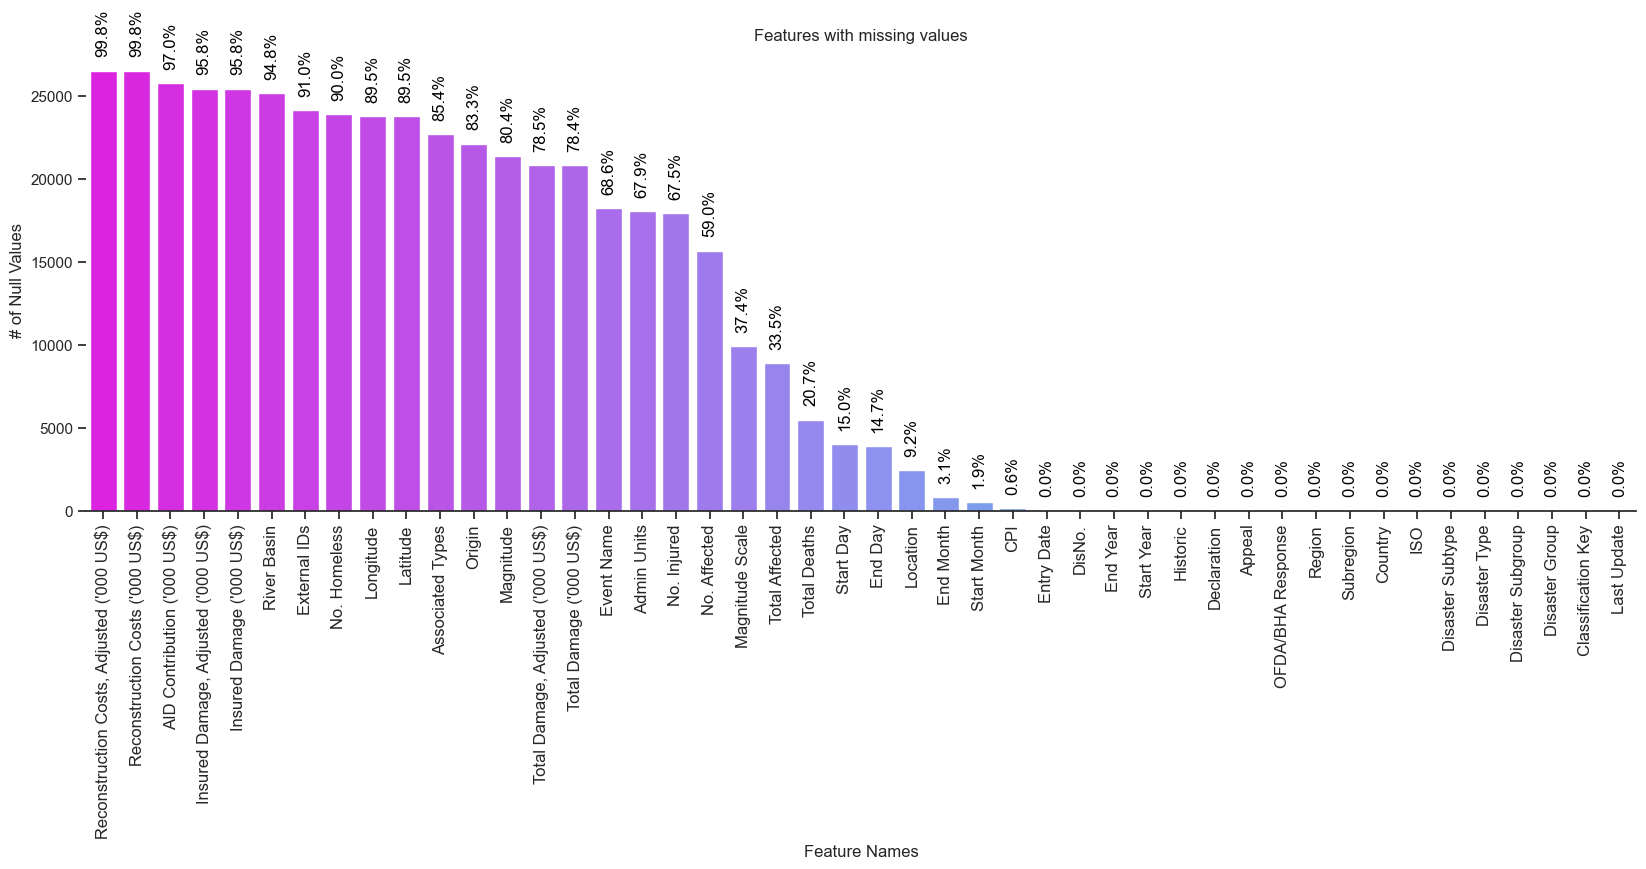

In [31]:
plot_null_columns(em_dat_data, "Features with missing values")

# EM-DAT’s natural disaster hierarchy grouping

In [33]:
disaster_columns = [
    "Disaster Subgroup",
    "Disaster Type",
    "Disaster Subtype",
]

disaster_df = em_dat_data[disaster_columns]

disaster_df = disaster_df.fillna(value={
    "Disaster Subtype": "NA",
})

disaster_df = pd.DataFrame(
    disaster_df.groupby(disaster_columns).size().to_frame("count")
)

disaster_df

count
Disaster Subgroup      Disaster Type                    Disaster Subtype                       
Biological             Animal incident                  Animal incident                       1
                       Epidemic                         Bacterial disease                   785
                                                        Infectious disease (General)        142
                                                        Parasitic disease                    51
                                                        Viral disease                       549
...                                                                                         ...
Miscellaneous accident Miscellaneous accident (General) Miscellaneous accident (General)    276
Transport              Air                              Air                                1092
                       Rail                             Rail                                646
                       Road                             Road                               2890
                       Water                            Water                              1639

[66 rows x 1 columns]

In [35]:
em_dat_data["Disaster Group"].unique()

array(['Natural', 'Technological'], dtype=object)

In [42]:
em_dat_data["Disaster Subgroup"].unique()

array(['Meteorological', 'Industrial accident', 'Hydrological',
       'Biological', 'Geophysical', 'Climatological',
       'Miscellaneous accident', 'Transport', 'Extra-terrestrial'],
      dtype=object)

In [44]:
meteorological_df = em_dat_data[em_dat_data["Disaster Subgroup"] == "Meteorological"]
meteorological_df

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,1900-0003-USA,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,USA,...,NaN,NaN,NaN,NaN,30000.0,1098720.0,2.730451,NaN,2004-10-18,2023-10-17
13,1902-0005-MMR,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,MMR,...,NaN,NaN,NaN,NaN,NaN,NaN,2.839669,NaN,2003-07-01,2023-09-25
27,1903-0008-JAM,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,JAM,...,NaN,NaN,NaN,NaN,NaN,NaN,2.948887,NaN,2003-07-01,2023-09-25
28,1903-0010-USA,Yes,nat-met-sto-tor,Natural,Meteorological,Storm,Tornado,NaN,NaN,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,2.948887,NaN,2003-07-01,2023-09-25
37,1904-0003-BGD,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,BGD,...,NaN,NaN,NaN,NaN,NaN,NaN,2.948887,NaN,2003-07-01,2023-09-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26523,2024-0242-THA,No,nat-met-sto-sev,Natural,Meteorological,Storm,Severe weather,NaN,NaN,THA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-23,2024-04-26
26532,2024-0263-PAK,No,nat-met-sto-sev,Natural,Meteorological,Storm,Severe weather,NaN,NaN,PAK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-30,2024-05-03
26534,2024-0265-CHN,No,nat-met-sto-tor,Natural,Meteorological,Storm,Tornado,NaN,NaN,CHN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-30,2024-05-03
26535,2024-0266-USA,No,nat-met-sto-tor,Natural,Meteorological,Storm,Tornado,NaN,NaN,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-30,2024-05-03


In [46]:
meteorological_df["Disaster Type"].unique()

array(['Storm', 'Extreme temperature', 'Fog'], dtype=object)

In [47]:
storm_df = meteorological_df[meteorological_df["Disaster Type"] == "Storm"]
storm_df.tail()

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
26523,2024-0242-THA,No,nat-met-sto-sev,Natural,Meteorological,Storm,Severe weather,NaN,NaN,THA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-23,2024-04-26
26532,2024-0263-PAK,No,nat-met-sto-sev,Natural,Meteorological,Storm,Severe weather,NaN,NaN,PAK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-30,2024-05-03
26534,2024-0265-CHN,No,nat-met-sto-tor,Natural,Meteorological,Storm,Tornado,NaN,NaN,CHN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-30,2024-05-03
26535,2024-0266-USA,No,nat-met-sto-tor,Natural,Meteorological,Storm,Tornado,NaN,NaN,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-30,2024-05-03
26540,2024-0272-VNM,No,nat-met-sto-sev,Natural,Meteorological,Storm,Severe weather,NaN,NaN,VNM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-02,2024-05-03


In [49]:
storm_df["Disaster Subtype"].unique()

array(['Tropical cyclone', 'Tornado', 'Hail', 'Storm (General)',
       'Severe weather', 'Blizzard/Winter storm',
       'Lightning/Thunderstorms', 'Sand/Dust storm',
       'Extra-tropical storm', 'Storm surge', 'Derecho'], dtype=object)